# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables

load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2 # Setting the amount of the bitcoin variable
my_eth = 5.3 # Setting the amount of the Ethereum variable

In [4]:
# Crypto API URLs
# Setting the URLS for the bitcoin and Etherium api to obtain prices

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"

In [5]:
# Fetch current BTC price
# Fetch current Bitcoin price
btc_return_data = requests.get(btc_url)
btc_return_data # Confirm there are no errors with the API


<Response [200]>

In [6]:
import json # import Json to read and format the data
btc_data = btc_return_data.json()

print(json.dumps(btc_data,indent = 4)) #Add indents to JSON and output the data to screen

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18606450,
            "total_supply": 18606450,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 31633.0,
                    "volume_24h": 63545661858,
                    "market_cap": 588575136403,
                    "percentage_change_1h": -2.67495137960658,
                    "percentage_change_24h": -9.47263544526421,
                    "percentage_change_7d": -15.5466452489369,
                    "percent_change_1h": -2.67495137960658,
                    "percent_change_24h": -9.47263544526421,
                    "percent_change_7d": -15.5466452489369
                }
            },
            "last_updated": 1611241668
        }
    },
    "metadata": {
        "timestamp": 1611241668,
        "num_cry

In [7]:
# Obtaining the price of bitcoin and setting it to a new variable
btc_price = btc_data['data']['1']['quotes']['USD']['price']
btc_price

31633.0

In [8]:
# Fetch current ETH price
# Fetch current Ethereum price
eth_return_data = requests.get(eth_url)
eth_return_data # Confirm there are no errors with the API


<Response [200]>

In [9]:
# Format the data
eth_data = eth_return_data.json() 

print(json.dumps(eth_data,indent = 4)) #Add indents to JSON and output the data to screen

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114344114,
            "total_supply": 114344114,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1217.23,
                    "volume_24h": 49376702086,
                    "market_cap": 138213246099,
                    "percentage_change_1h": -0.796516652714911,
                    "percentage_change_24h": -6.99831372706684,
                    "percentage_change_7d": 7.52759820515403,
                    "percent_change_1h": -0.796516652714911,
                    "percent_change_24h": -6.99831372706684,
                    "percent_change_7d": 7.52759820515403
                }
            },
            "last_updated": 1611241713
        }
    },
    "metadata": {
        "timestamp": 1611241713,
        "num_

In [10]:
# Obtaining the price of Ethereum and setting it to a new variable
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_price

1217.23

In [11]:
# Compute current value of my crpto
# Compute the current value of the crypto currency

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $37959.60
The current value of your 5.3 ETH is $6451.32


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Current amount of shares
# Set the current amount of shares

my_agg = 200 # Set the amount of bond shares
my_spy = 50 # Set the amount of stock shares

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')

# Create the Alpaca API object
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"

)

In [14]:
# Format current date as ISO format

from datetime import date # Import the date function datetime to set the current day

today = pd.Timestamp(date.today(), tz='America/New_York').isoformat()

# Set the tickers

tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API

timeframe = "1D"

# Get current closing prices for SPY and AGG

investments = alpaca.get_barset(
    tickers,
    timeframe,
    end = today,
    start = today

).df


# Preview DataFrame
investments

AGG                                     SPY  \
                             open    high     low   close  volume    open   
time                                                                        
2021-01-21 00:00:00-05:00  117.22  117.22  117.14  117.17  713279  384.49   

                                                            
                             high     low   close   volume  
time                                                        
2021-01-21 00:00:00-05:00  384.52  383.25  383.99  8102342

In [15]:
# Pick AGG and SPY close prices

agg_close_price = float(investments['AGG']['close'])
spy_close_price = float(investments['SPY']['close'])

# Print AGG and SPY close prices

print(f"Current AAG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AAG closing price: $117.17
Current SPY closing price: $383.99


In [16]:
# Compute the current value of shares

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share

print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19199.50
The current value of your 200 AGG shares is $23434.00


### Savings Health Analysis

In [17]:
# Set the monthly household income

monthly_income = 12000

# Create savings DataFrame

data = {'Amount':[my_btc_value+my_eth_value,my_spy_value+my_agg_value]} # Set the data equal to the total value of savings

df_savings = pd.DataFrame(data, index=['Crypto','Shares']) # Create the DataFrame

# Display the dataframe

display(df_savings)

,Amount
Crypto,44410.919
Shares,42633.500


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

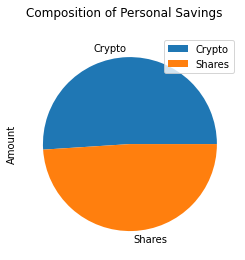

In [18]:
# Plot the pie chart

df_savings.plot(kind='pie', subplots = True, title = 'Composition of Personal Savings')

In [19]:
# Set the ideal emergency fund

emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings = my_btc_value + my_eth_value + my_spy_value + my_agg_value

# Validate savings health

if total_savings >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print(f"You do not have enough money in your emergency fund.  Your are current ${emergency_fund - total_savings} below the recommended savings amount.")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.

import datetime # Import library in order to calculate five years from today using the datetime.timedelta function

end_date = pd.Timestamp(date.today(), tz ='America/New_York').isoformat() # Set the end date as the current date
start_date = pd.Timestamp(date.today() - datetime.timedelta(days = 5*365), tz ='America/New_York').isoformat() # Set the start date to five years prior to the current date



In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers

tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API

timeframe = "1D"

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date

).df



# Display sample data
df_stock_data.head(10)

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   
2016-02-01 00:00:00-05:00  109.10  109.2500  108.8415  108.97  4186126   
2016-02-02 00:00:00-05:00  109.23  109.3800  109.1301  109.33  4160559   
2016-02-03 00:00:00-05:00  109.26  109.6400  109.2000  109.29  3546260   
2016-02-04 00:00:00-05:00  109.34  109.4600  109.2350  109.40  1761807   
2016-02-05 00:00:00-05:00  109.24  109.4400  109.1532  109.31  2032871   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2016-01-25 00:00:00-05:00  189.93  190.15  187.41  187.66   99219694  
2016-01-26 00:00:00-05:00  188.42  190.53  188.02  190.18  115312517  
2016-01-27 00:00:00-05:00  189.58  191.56  187.06  188.12  157060622  
2016-01-28 00:00:00-05:00  189.96  190.20  187.16  189.14  118949268  
2016-01-29 00:00:00-05:00  190.02  193.75  189.88  193.69  145410523  
2016-02-01 00:00:00-05:00  192.53  194.58  191.84  193.69   98369142  
2016-02-02 00:00:00-05:00  191.96  191.97  189.54  190.13  128934910  
2016-02-03 00:00:00-05:00  191.41  191.78  187.10  191.19  182430296  
2016-02-04 00:00:00-05:00  190.71  192.75  189.96  191.55  120427508  
2016-02-05 00:00:00-05:00  190.99  191.08  187.20  187.95  141736013

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns with a 40/60 distribution of AGG and SPY respectively

MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = (30 * 252)
    
)

# Simulation input data
# Printing the simulation input data

MC_thirtyyears.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-25 00:00:00-05:00          NaN  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   
2016-01-28 00:00:00-05:00     0.000826  189.96  190.20  187.16  189.14   
2016-01-29 00:00:00-05:00     0.002568  190.02  193.75  189.88  193.69   

                                                   
                              volume daily_return  
time                                               
2016-01-25 00:00:00-05:00   99219694          NaN  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832  
2016-01-28 00:00:00-05:00  118949268     0.005422  
2016-01-29 00:00:00-05:00  145410523     0.024056

In [23]:
# Running the Monte Carlo simulation to forecast 30 years cumulative returns with a 40/60 distribution of AGG and SPY respectively

MC_thirtyyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009142,1.007140,0.996414,1.014058,0.989590,1.002869,1.008154,1.007772,1.004968,1.007325,...,1.000123,0.997123,0.999570,1.004250,1.010101,1.001458,1.000589,1.007705,1.008427,0.987139
2,0.994296,1.011889,0.991096,1.016018,0.988386,1.006180,1.012418,1.010098,0.993833,1.009038,...,1.001668,0.993726,0.998466,1.000816,1.012570,0.993398,0.997026,1.002687,1.006639,0.988185
3,0.994803,1.018798,0.994704,1.020004,0.985573,1.009968,1.011647,1.020044,1.000088,1.014060,...,1.010331,0.982756,1.007585,0.997129,1.002820,0.984265,1.000089,0.994252,1.007974,0.994748
4,0.995001,1.014352,0.989584,1.033034,0.981527,0.996062,0.997806,1.033586,0.995886,1.017382,...,1.014103,0.977736,1.007327,0.984673,0.995594,0.986416,0.999583,1.001217,1.011851,1.002844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.283531,15.477886,19.854607,27.251115,26.876749,10.471653,30.653468,6.199623,13.654041,17.051333,...,25.927793,2.760182,12.196369,17.566260,5.301067,7.171282,7.124115,10.972985,7.421331,12.510761
7557,9.317669,15.477407,19.919130,27.204865,26.968566,10.536310,30.908006,6.238453,13.828229,17.169675,...,26.228168,2.759703,12.207196,17.663479,5.243775,7.140762,7.116278,10.976802,7.384729,12.411254
7558,9.398310,15.543684,20.032824,27.231026,27.027657,10.640826,30.695823,6.216808,13.863109,17.034952,...,26.321305,2.789282,12.186102,17.843069,5.218636,7.198532,7.125359,10.998830,7.382318,12.336646
7559,9.395594,15.548826,20.060048,27.339124,27.243308,10.573108,30.811361,6.169705,13.734880,17.060816,...,26.137376,2.760972,12.285351,18.073775,5.292949,7.145782,7.137506,11.000792,7.370501,12.191806


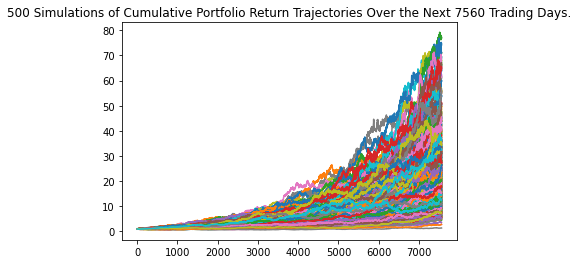

In [24]:
# Plot simulation outcomes

line_plot = MC_thirtyyears.plot_simulation()

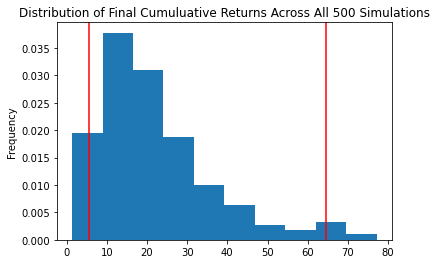

In [25]:
# Plot probability distribution and confidence intervals

dist_plot = MC_thirtyyears.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
# Obtain the summary statistics from the Monte Carlo simulation results

tbl = MC_thirtyyears.summarize_cumulative_return()

# Printout of summary statistics

print (tbl)

count           500.000000
mean             21.924403
std              14.228305
min               1.384445
25%              11.805054
50%              18.184415
75%              27.619145
max              77.099867
95% CI Lower      5.471968
95% CI Upper     64.458309
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment at $20,000

initial_investment = 20000

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

#Print out of results

print(f"There is a 95% chance that an intial investment of ${initial_investment} in the portfolio over the next 30 years will end within the range of ${ci_lower} and ${ci_upper}")

There is a 95% chance that an intial investment of $20000 in the portfolio over the next 30 years will end within the range of $109439.36 and $1289166.18


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Set initial investment at $30,000

initial_investment2 = 20000 * 1.5

ci_lower2 = round(tbl[8]*initial_investment2,2)
ci_upper2 = round(tbl[9]*initial_investment2,2)

#Print out of results

print(f"There is a 95% chance that an intial investment of ${initial_investment2} in the portfolio over the next 30 years will end within the range of ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an intial investment of $30000.0 in the portfolio over the next 30 years will end within the range of $164159.04 and $1933749.28


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns with a 20/80 distribution of AGG and SPY respectively

MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = (5 * 252)
    
)

# Simulation input data

MC_fiveyears.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-25 00:00:00-05:00          NaN  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   
2016-01-28 00:00:00-05:00     0.000826  189.96  190.20  187.16  189.14   
2016-01-29 00:00:00-05:00     0.002568  190.02  193.75  189.88  193.69   

                                                   
                              volume daily_return  
time                                               
2016-01-25 00:00:00-05:00   99219694          NaN  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832  
2016-01-28 00:00:00-05:00  118949268     0.005422  
2016-01-29 00:00:00-05:00  145410523     0.024056

In [30]:
# Running the Monte Carlo simulation to forecast 5 years cumulative returns with a 20/80 distribution of AGG and SPY respectively

MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996927,1.003453,0.987419,1.000673,0.991745,1.020001,0.986282,1.008987,1.022418,0.995712,...,1.002614,0.985648,1.001659,1.012922,0.986182,0.991599,0.990316,1.006125,0.992467,0.998634
2,1.011621,1.011497,0.983698,1.016998,0.981372,1.018240,0.974776,1.014684,1.031414,0.996684,...,1.004184,0.972469,0.993138,1.013855,0.996332,0.988868,0.983041,1.009429,0.991523,1.018832
3,1.009121,1.006203,0.978658,1.009161,0.977814,1.006926,0.985883,1.039872,1.029985,0.990672,...,0.987725,0.975597,0.995237,0.997759,1.003584,0.990240,0.990343,0.993822,0.991698,1.015609
4,0.996916,0.996426,0.973718,0.991510,0.963911,1.002695,0.978999,1.031848,1.020230,0.975853,...,0.992010,0.977796,0.982509,1.000013,1.022465,0.997343,0.997106,0.992092,0.999426,1.023509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.380260,1.763193,2.077046,1.130393,2.459324,1.202410,2.768902,2.584666,1.715481,1.202467,...,1.823174,1.673844,1.066723,1.399864,1.976121,3.049257,1.771953,1.317121,1.416440,2.187403
1257,1.390178,1.766156,2.068370,1.153888,2.415001,1.200568,2.763663,2.594475,1.713666,1.187115,...,1.822828,1.641050,1.053704,1.395493,1.961777,3.034626,1.778979,1.335987,1.409493,2.189561
1258,1.384254,1.752574,2.106902,1.138723,2.415367,1.193488,2.747151,2.612841,1.713190,1.201346,...,1.820878,1.656060,1.050304,1.412862,1.975541,3.012030,1.763160,1.330253,1.396360,2.148051
1259,1.389636,1.757265,2.134861,1.144222,2.428657,1.197919,2.808143,2.627445,1.711342,1.200351,...,1.824129,1.677348,1.036720,1.420744,1.999092,3.013976,1.726307,1.345849,1.407814,2.144623


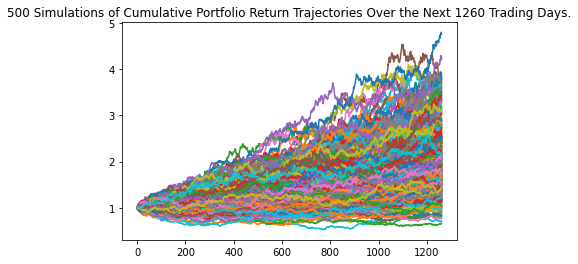

In [31]:
# Plot simulation outcomes

line_plot = MC_fiveyears.plot_simulation()

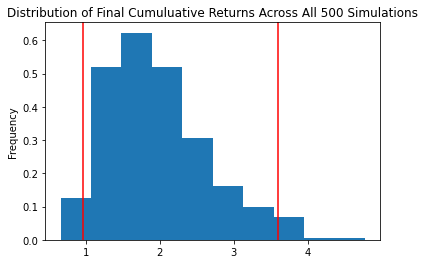

In [32]:
# Plot probability distribution and confidence intervals

dist_plot = MC_fiveyears.plot_distribution()

In [33]:
# Obtain the summary statistics from the Monte Carlo simulation results

tbl5 = MC_fiveyears.summarize_cumulative_return()

# Printout of summary statistics

print (tbl5)

count           500.000000
mean              1.959875
std               0.682493
min               0.659895
25%               1.446098
50%               1.828980
75%               2.331684
max               4.769327
95% CI Lower      0.962408
95% CI Upper      3.599392
Name: 1260, dtype: float64


In [34]:
# Calculate expected portfolio return at a 95% upper and lower confidance interval

# Set initial investment at $40,000

initial_investment5 = 40000

ci_lower5 = round(tbl5[8]*initial_investment5,2)
ci_upper5 = round(tbl5[9]*initial_investment5,2)

#Print out of results

print(f"There is a 95% chance that an intial investment of ${initial_investment5} in the portfolio over the next 5 years will end within the range of ${ci_lower5} and ${ci_upper5}")

There is a 95% chance that an intial investment of $40000 in the portfolio over the next 5 years will end within the range of $38496.32 and $143975.67


### Ten Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns with a 20/80 distribution of AGG and SPY respectively

MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = (10 * 252)
    
)

# Simulation input data

MC_tenyears.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-25 00:00:00-05:00          NaN  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   
2016-01-28 00:00:00-05:00     0.000826  189.96  190.20  187.16  189.14   
2016-01-29 00:00:00-05:00     0.002568  190.02  193.75  189.88  193.69   

                                                   
                              volume daily_return  
time                                               
2016-01-25 00:00:00-05:00   99219694          NaN  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832  
2016-01-28 00:00:00-05:00  118949268     0.005422  
2016-01-29 00:00:00-05:00  145410523     0.024056

In [36]:
# Running the Monte Carlo simulation to forecast 10 years cumulative returns with a 20/80 distribution of AGG and SPY respectively

MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.962532,1.006833,1.003509,1.015909,0.992671,1.006134,0.981914,1.003973,0.999828,0.994727,...,0.987756,0.991617,1.008579,0.996069,1.006695,0.999348,0.996748,1.011302,1.011077,1.007868
2,0.980467,1.026281,0.991749,1.007449,0.978394,1.004666,0.992184,0.991071,1.015796,0.999084,...,0.989950,0.999447,1.007935,1.008580,0.998868,1.004492,1.002349,1.010385,1.011612,1.008929
3,1.003349,1.019950,0.986548,1.020909,0.989951,0.995763,0.983990,1.002073,1.034422,1.006198,...,0.983057,1.001859,1.005740,1.017471,1.002768,1.002385,0.997907,1.035200,1.005945,1.004335
4,0.994913,1.004214,1.004512,1.025724,0.987735,0.988621,0.993462,1.002639,1.030302,0.993771,...,0.991109,0.998569,1.011819,1.002412,1.007431,1.015654,1.010518,1.025597,1.017513,1.011376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.847718,3.989743,5.363220,8.244529,4.796566,4.613862,3.744532,3.081913,4.727554,2.025910,...,13.801479,4.781817,2.437516,3.533795,3.095508,4.392098,7.017180,3.091478,5.630427,3.460347
2517,2.859055,4.017877,5.402166,8.168621,4.832026,4.617918,3.724189,3.066644,4.670565,2.034051,...,13.647506,4.787223,2.434455,3.520637,3.065919,4.393139,7.030812,3.072650,5.639113,3.460106
2518,2.887758,4.031923,5.354294,8.287392,4.822109,4.655017,3.725158,3.076401,4.627503,2.037181,...,13.607163,4.865398,2.435791,3.548803,3.019498,4.391286,7.055964,3.021753,5.626017,3.435085
2519,2.891417,4.080054,5.306187,8.419733,4.823491,4.659476,3.738101,3.086883,4.585320,2.040930,...,13.621090,4.827801,2.418695,3.533269,2.981539,4.438172,6.842500,2.998426,5.549040,3.483000


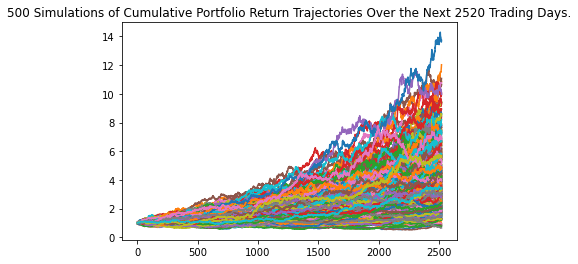

In [37]:
# Plot simulation outcomes

line_plot = MC_tenyears.plot_simulation()

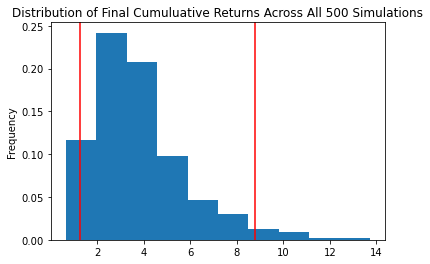

In [38]:
# Plot probability distribution and confidence intervals

dist_plot = MC_tenyears.plot_distribution()

In [39]:
# Obtain the summary statistics from the Monte Carlo simulation results

tbl10 = MC_tenyears.summarize_cumulative_return()

# Printout of summary statistics

print (tbl10)

count           500.000000
mean              3.797857
std               1.988724
min               0.660022
25%               2.349717
50%               3.371956
75%               4.650438
max              13.728572
95% CI Lower      1.272148
95% CI Upper      8.800223
Name: 2520, dtype: float64


In [40]:
# Calculate expected portfolio return at a 95% upper and lower confidance interval

# Set initial investment at $60,000

initial_investment10 = 60000

ci_lower10 = round(tbl10[8]*initial_investment10,2)
ci_upper10 = round(tbl10[9]*initial_investment10,2)

#Print out of results

print(f"There is a 95% chance that an intial investment of ${initial_investment10} in the portfolio over the next 10 years will end within the range of ${ci_lower10} and ${ci_upper10}")

There is a 95% chance that an intial investment of $60000 in the portfolio over the next 10 years will end within the range of $76328.86 and $528013.38
